### Avaliação semana 3

Nesse documento contém o código usado para encontrar o número ideal de clusters para agrupar as amostras do banco de dados de músicas do Spotify "musicas_spotify_limpo.csv". 

Nome: João Victor Cordeiro

In [109]:
# Importação das libs usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Carregando os dados ⬇

In [ ]:
df_spotify = pd.read_csv('./dataset/musicas_spotify_limpo.csv')

df_spotify.head()

,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


In [111]:
# Padronizando/normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_spotify)

#### Visualizando os dados ⬇

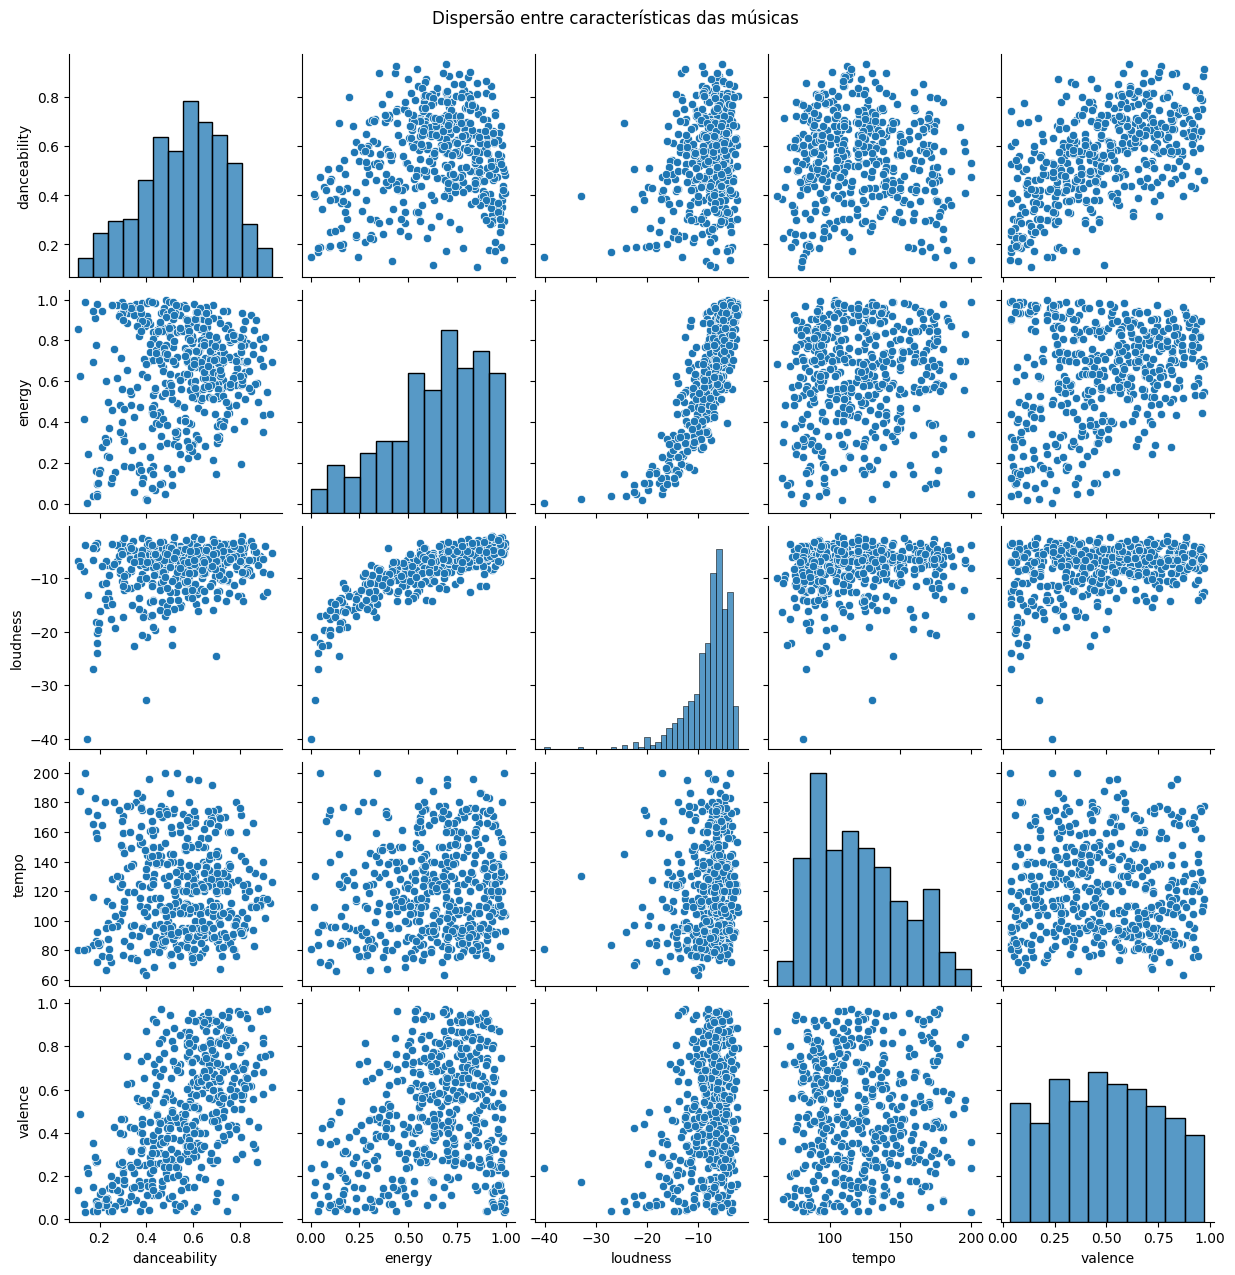

In [112]:
# Pairplot para visualizar as relações entre variáveis
sns.pairplot(df_spotify)
plt.suptitle("Dispersão entre características das músicas", y=1.02)
plt.show()

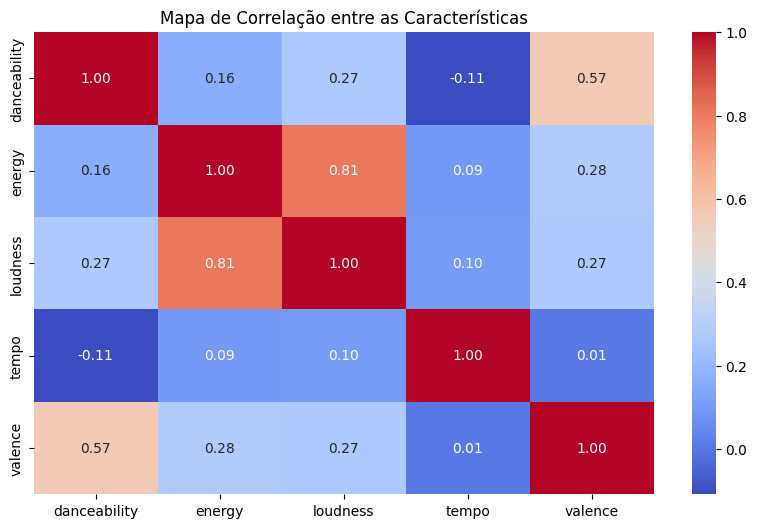

In [113]:
# Resumo das correlações entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_spotify.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre as Características")
plt.show()

In [114]:
# Métodos para plot
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

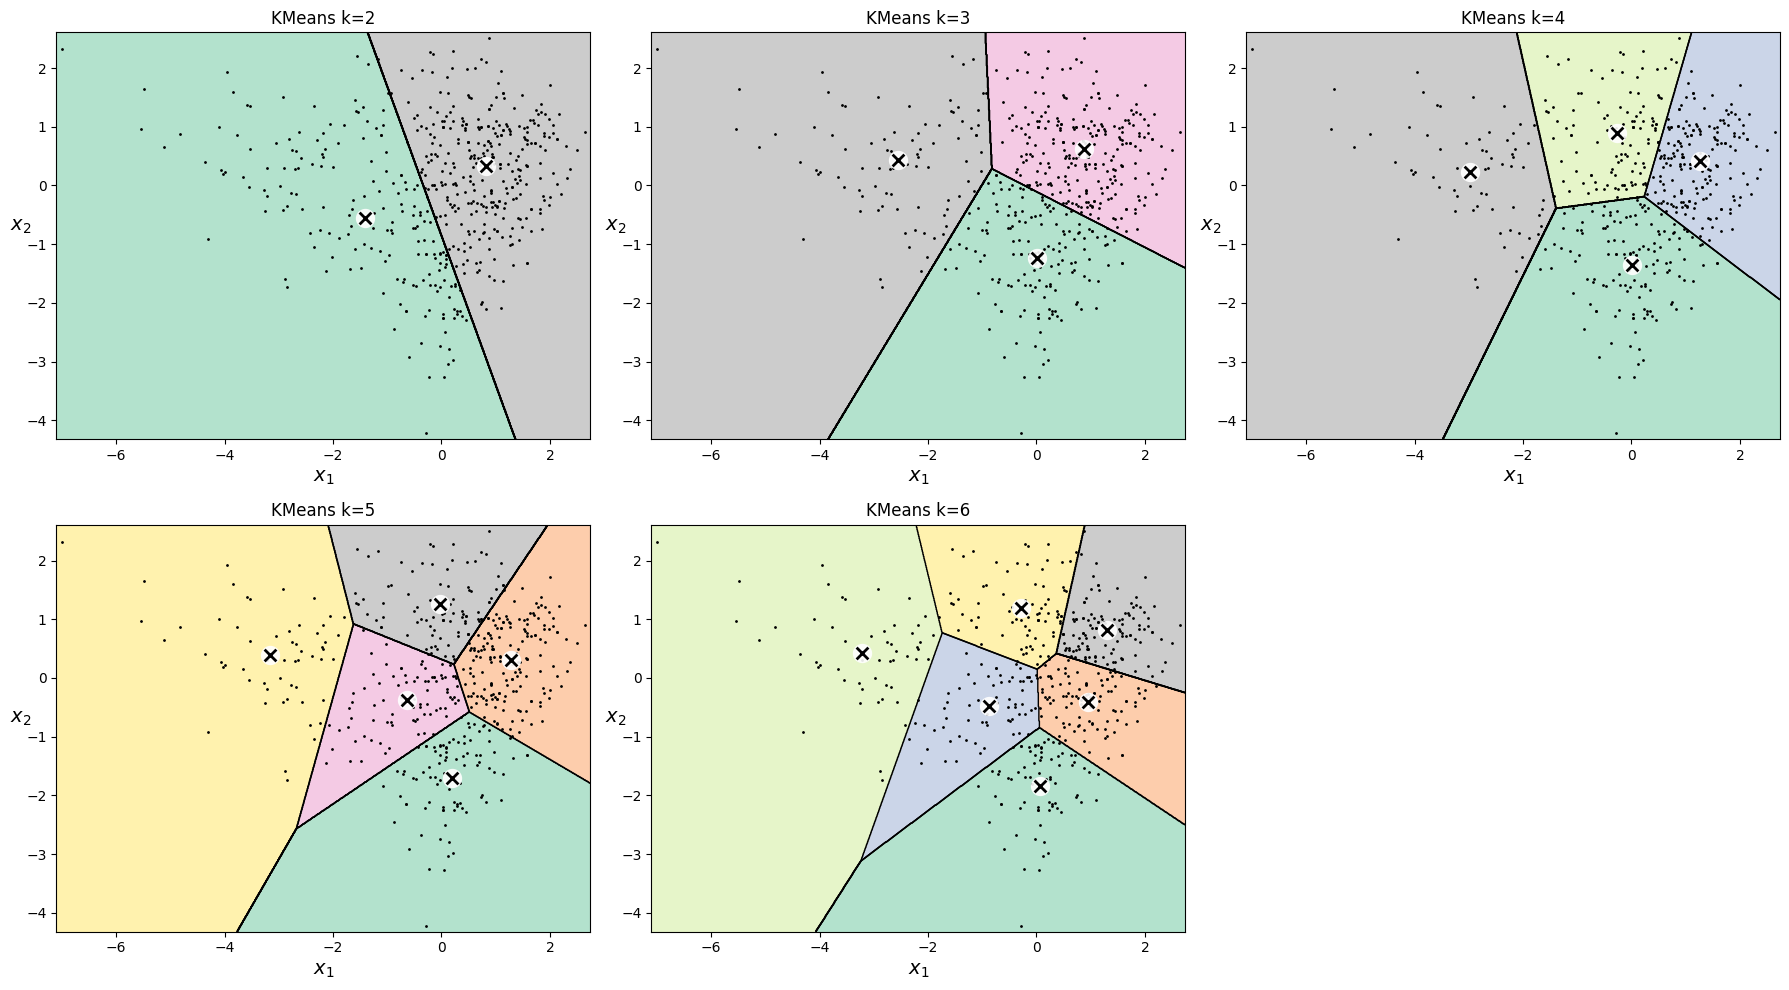

In [115]:
# Reduzindo para 2D com PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df_scaled)

# Treinando o KMeans
kmeans_model_with_2_clusters = KMeans(n_clusters=2, random_state=42)
kmeans_model_with_2_clusters.fit(X)

kmeans_model_with_3_clusters = KMeans(n_clusters=3, random_state=42)
kmeans_model_with_3_clusters.fit(X)

kmeans_model_with_4_clusters = KMeans(n_clusters=4, random_state=42)
kmeans_model_with_4_clusters.fit(X)

kmeans_model_with_5_clusters = KMeans(n_clusters=5, random_state=42)
kmeans_model_with_5_clusters.fit(X)

kmeans_model_with_6_clusters = KMeans(n_clusters=6, random_state=42)
kmeans_model_with_6_clusters.fit(X)

# Plotando
plt.figure(figsize=(18, 10))

# Primeira linha
plt.subplot(2, 3, 1)
plot_decision_boundaries(kmeans_model_with_2_clusters, X)
plt.title("KMeans k=2")

plt.subplot(2, 3, 2)
plot_decision_boundaries(kmeans_model_with_3_clusters, X)
plt.title("KMeans k=3")

plt.subplot(2, 3, 3)
plot_decision_boundaries(kmeans_model_with_4_clusters, X)
plt.title("KMeans k=4")

# Segunda linha
plt.subplot(2, 3, 4)
plot_decision_boundaries(kmeans_model_with_5_clusters, X)
plt.title("KMeans k=5")

plt.subplot(2, 3, 5)
plot_decision_boundaries(kmeans_model_with_6_clusters, X)
plt.title("KMeans k=6")

plt.tight_layout()
plt.show()


#### Gerando o gráfico de cotovelo ⬇

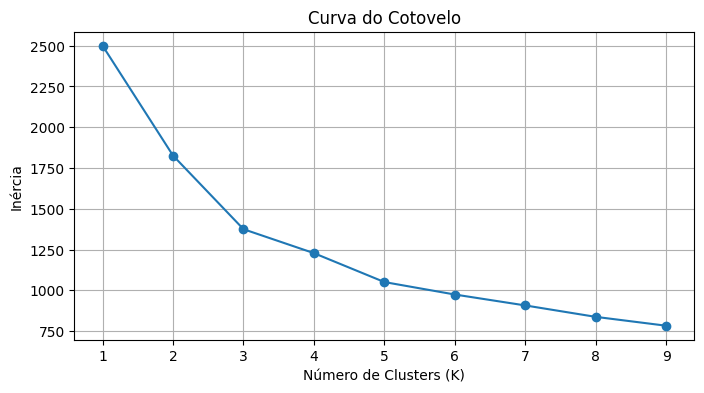

In [116]:
# Gerando a curva de cotovelo
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Curva do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

Com base no gráfico da Curva do Cotovelo, a inflexão mais visível ocorre em: K = 5 pois é a partir do 5 que a redução da inércia passa a ser pequena.

De K=1 → K=2 → K=3 → K=4, há grandes quedas na inércia, de K=5 em diante, a inércia continua caindo, mas em ritmo cada vez menor.

#### Gerando o diagrama de Silhueta ⬇

K = 2 | Índice médio de silhueta: 0.2729
K = 3 | Índice médio de silhueta: 0.2590
K = 4 | Índice médio de silhueta: 0.2117
K = 5 | Índice médio de silhueta: 0.2280
K = 6 | Índice médio de silhueta: 0.2133
K = 7 | Índice médio de silhueta: 0.2128


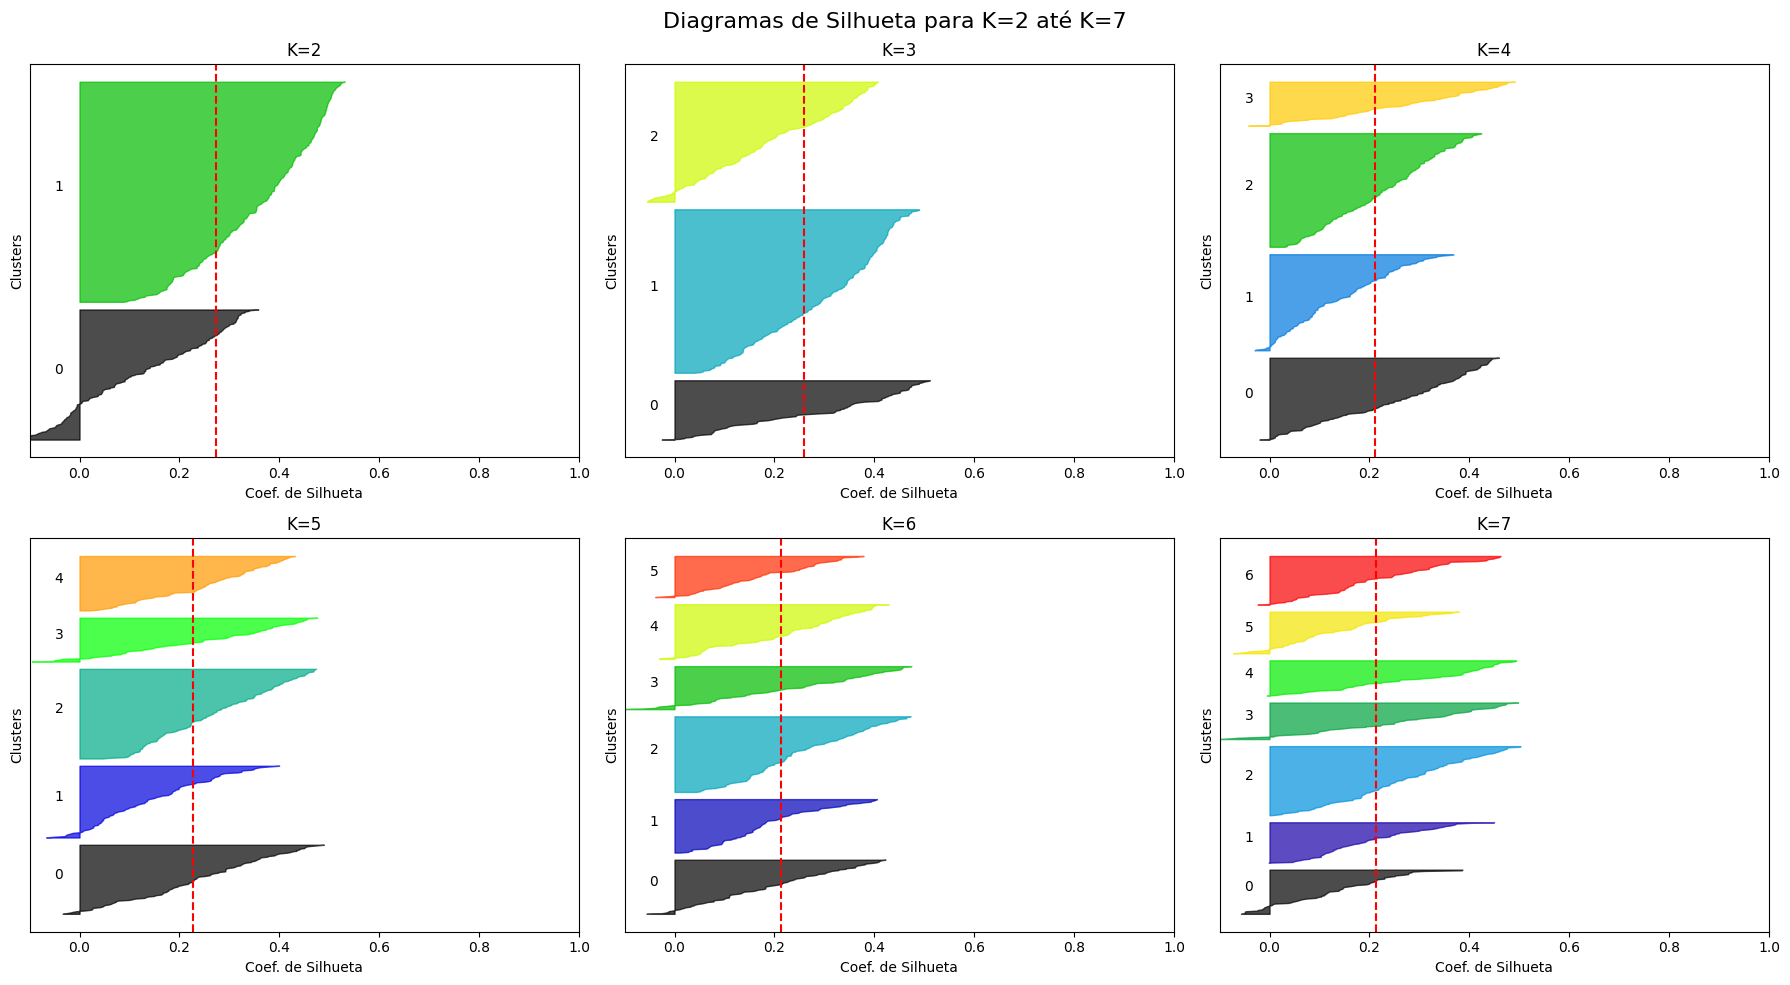

In [117]:
# Definindo o intervalo de valores de K para testar
range_k = [2, 3, 4, 5, 6, 7]

# Criando a grade de subplots para os diagramas de silhueta
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Loop para cada valor de K
for idx, k in enumerate(range_k):
    ax1 = axes[idx]
    
    # Treinando o modelo KMeans e obtendo os rótulos dos clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calculando o índice médio de silhueta para o valor de K atual
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"K = {k} | Índice médio de silhueta: {silhouette_avg:.4f}")

    # Calculando os valores individuais de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    # Para cada cluster, plota a silhueta dos pontos pertencentes a ele
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Configurações do gráfico
    ax1.set_title(f"K={k}")
    ax1.set_xlabel("Coef. de Silhueta")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])

# Título geral e ajustes finais
fig.suptitle("Diagramas de Silhueta para K=2 até K=7", fontsize=16)
plt.tight_layout()
plt.show()


O maior índice médio de silhueta significa que os pontos estão em média melhor separados e agrupados.

Segundo a representação de silhueta os clusters com K=2 são mais distintos entre si, menos sobreposição, menos ambiguidade pelo fato do K=2 ter o maior indice médio. Porém a melhor visualização é com K=4 pelo fato de ter os menores índices negativos.

Embora no gráfico de cotovelo K=5 foi um possível ponto de inflexão na inércia, os clusters se confundem mais do que com K=2.

#### Visualizando os agrupamentos ⬇

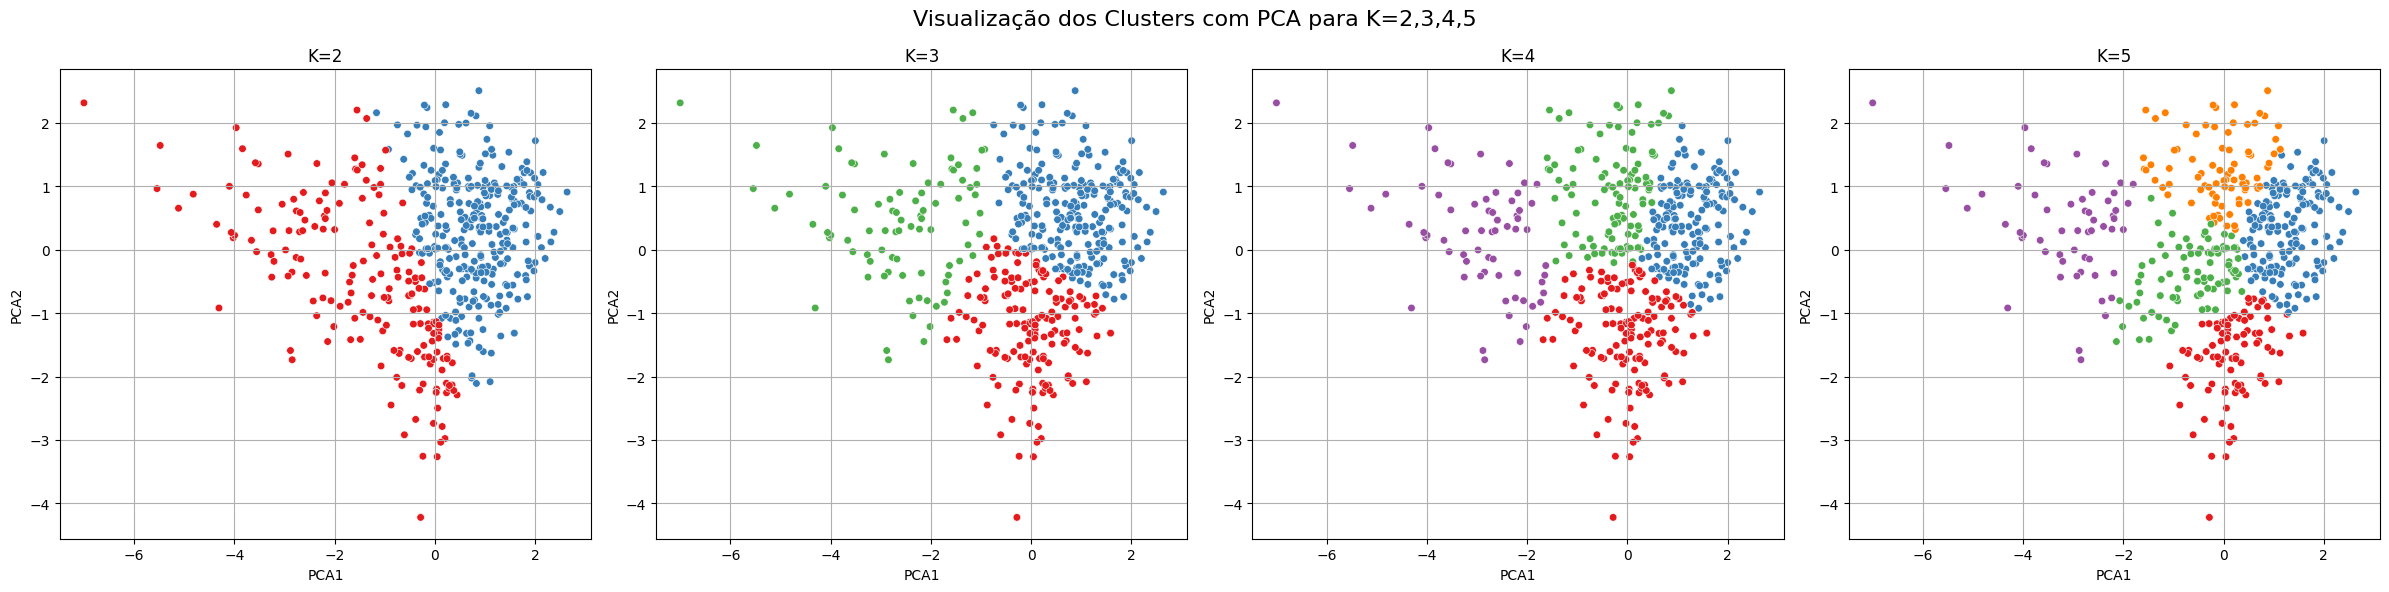

In [118]:
# Aplica a transformação PCA para reduzir os dados para 2 dimensões
pca_result = pca.transform(df_scaled)
df_spotify['PCA1'] = pca_result[:, 0]
df_spotify['PCA2'] = pca_result[:, 1]

# Lista de valores de K para testar nos agrupamentos
ks = [2, 3, 4, 5]

plt.figure(figsize=(24, 6))

# Para cada valor de K, ajusta o KMeans, atribui os rótulos e plota os clusters
for i, k in enumerate(ks, 1):
    # Treina o modelo KMeans com k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    # Adiciona os rótulos dos clusters ao DataFrame
    df_spotify[f'cluster_{k}'] = cluster_labels
    
    # Plota os dados reduzidos pelo PCA, colorindo por cluster
    plt.subplot(1, 4, i)
    sns.scatterplot(
        data=df_spotify, x='PCA1', y='PCA2',
        hue=f'cluster_{k}', palette='Set1', s=30, legend=False
    )
    plt.title(f'K={k}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.grid(True)

plt.suptitle('Visualização dos Clusters com PCA para K=2,3,4,5', fontsize=16)
plt.tight_layout()
plt.show()


### Conclusão ⬇

Com base nas etapas realizadas, podemos concluir:

- **Curva do Cotovelo**: Indicou que os melhores valores de K estão entre **4 e 5**, pois a redução da inércia começa a se estabilizar a partir desse ponto.
- **Índice de Silhueta**: Sugeriu que **K = 2** apresenta o melhor valor médio, indicando uma separação mais definida entre dois grupos.
- **Visualização com PCA**: A análise gráfica mostra que com **K = 5** há uma separação visual mais coerente, onde os grupos aparentam estar mais bem definidos do que com K=2 ou K=3.

Portanto, mesmo que o índice de silhueta tenha apontado para K=2, a visualização dos dados após a redução de dimensionalidade com PCA sugere que **K = 5** é uma boa escolha, equilibrando qualidade matemática com uma divisão visualmente interpretável dos dados.

Assim, concluo que a **melhor separação foi obtida com 5 clusters**.